# Locally Weighted  Logistic Regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Setup dataset

In [2]:
radius = 1
outer_square = np.sqrt(np.pi*2)
x_min = -outer_square/2
x_max = -x_min
y_min = x_min
y_max = x_max
m = 200

In [6]:
x = np.random.uniform(x_min,x_max,(m,1))
y = np.random.uniform(y_min,y_max,(m,1))
label = np.zeros((m,1))
label[x**2+y**2>radius] = 1

(-1.5, 1.4000000000000026, -1.5, 1.4000000000000026)

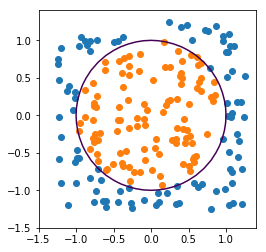

In [15]:
plt.scatter(x[label==1],y[label==1])
plt.scatter(x[label==0],y[label==0])
circle_x = np.arange(-1.5,1.5,0.1)
circle_y = np.arange(-1.5,1.5,0.1)
c_x, c_y = np.meshgrid(circle_x,circle_y)
plt.contour(c_x, c_y, c_x**2 + c_y**2,[1])
plt.axis('scaled')

In [19]:
print(f"正样本：{(label==0).sum()}")
print(f"负样本：{(label==1).sum()}")

正样本：107
负样本：93


In [64]:
def g(eta):
    return 1/(1+np.e**(-eta))

def cost(X,label,theta,lamBda,weight):
    return -lamBda/2*theta.T.dot(theta)+ weight.T.dot(label*np.log(g(X.dot(theta)))+(1-label)*np.log(1-g(X.dot(theta))))

def gradient(X,label,theta,lamBda,weight):
    return X.T.dot(weight*(label-g(X.dot(theta)))) - lamBda*theta

def h(X,label,theta,lamBda,weight):
    D = np.diag((-weight*g(X.dot(theta))*(1-g(X.dot(theta)))).reshape((-1,)))
    #print(-weight*g(X.dot(theta))*(1-g(X.dot(theta))))
    #print(D)
    return X.T.dot(D).dot(X) - lamBda*np.eye(3)

In [54]:
X = np.ones((m,1))
X = np.hstack((X,x))
X = np.hstack((X,y))

## Logistic Regression

In [81]:
LAMBDA = np.array([0,0.001,0.01,0.1,1,10])
Theta = np.zeros((3,LAMBDA.shape[0]))

for i in range(LAMBDA.shape[0]):
    theta = np.zeros((3,1))
    max_iteration_num = 5
    weight = np.ones((m,1))
    lamBda = LAMBDA[i]
    for epoch in range(max_iteration_num):
        Cost = cost(X,label,theta,lamBda,weight)
        Gradient = gradient(X,label,theta,lamBda,weight)
        H = h(X,label,theta,lamBda,weight)
        theta = theta - np.linalg.solve(H,Gradient)
        print(f"epoch:{epoch},cost:{Cost}")
    Theta[:,i] = theta.reshape((-1,))

epoch:0,cost:[[-138.62943611]]
epoch:1,cost:[[-137.02256398]]
epoch:2,cost:[[-137.02225429]]
epoch:3,cost:[[-137.02225429]]
epoch:4,cost:[[-137.02225429]]
epoch:0,cost:[[-138.62943611]]
epoch:1,cost:[[-137.02262483]]
epoch:2,cost:[[-137.02231523]]
epoch:3,cost:[[-137.02231523]]
epoch:4,cost:[[-137.02231523]]
epoch:0,cost:[[-138.62943611]]
epoch:1,cost:[[-137.02317227]]
epoch:2,cost:[[-137.0228634]]
epoch:3,cost:[[-137.0228634]]
epoch:4,cost:[[-137.0228634]]
epoch:0,cost:[[-138.62943611]]
epoch:1,cost:[[-137.02862447]]
epoch:2,cost:[[-137.02832287]]
epoch:3,cost:[[-137.02832287]]
epoch:4,cost:[[-137.02832287]]
epoch:0,cost:[[-138.62943611]]
epoch:1,cost:[[-137.08102056]]
epoch:2,cost:[[-137.08078159]]
epoch:3,cost:[[-137.08078159]]
epoch:4,cost:[[-137.08078159]]
epoch:0,cost:[[-138.62943611]]
epoch:1,cost:[[-137.45601229]]
epoch:2,cost:[[-137.45597778]]
epoch:3,cost:[[-137.45597778]]
epoch:4,cost:[[-137.45597778]]


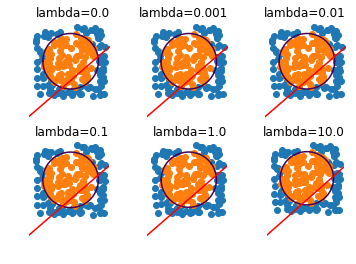

In [95]:
for i in range(6):
    theta = Theta[:,i].reshape((-1,1))
    lamBda = LAMBDA[i]
    pos = int('23' + str(i+1))
    plt.subplot(pos)
    x_ = np.arange(-1.5,1.5,0.1)
    y_ = -(theta[0,0]+theta[1,0]*x_)/theta[2,0]
    plt.scatter(x[label==1],y[label==1])
    plt.scatter(x[label==0],y[label==0])
    circle_x = np.arange(-1.5,1.5,0.1)
    circle_y = np.arange(-1.5,1.5,0.1)
    c_x, c_y = np.meshgrid(circle_x,circle_y)
    plt.contour(c_x, c_y, c_x**2 + c_y**2,[1])
    plt.plot(x_,y_,'r')
    #plt.legend(['result','positive samples','negative samples'])
    plt.title('lambda='+str(lamBda),loc='right')
    plt.axis('scaled')
    plt.axis('off')

## Locally Weighted Logistic Regression

In [96]:
def cal_weight(x_to_pred,X,tao):
    w = np.zeros((m,1))
    for i in range(m):
        w[i,0] = np.e**(-np.linalg.norm(X[i,:]-x_to_pred.reshape((1,3)))**2/2/tao/tao)
    return w

## Comparation

### gen test set

In [103]:
testm = 100
x_test = np.random.uniform(x_min,x_max,(testm,1))
y_test = np.random.uniform(y_min,y_max,(testm,1))
label_test = np.zeros((testm,1))

label_test[x_test**2+y_test**2>radius] = 1
X_ = np.ones((testm,1))
X_ = np.hstack((X_,x_test))
X_ = np.hstack((X_,y_test))

### logistic regression

In [105]:
theta = Theta[:,0].reshape((-1,1))
pred = g(X_.dot(theta))
pred[pred>=0.5] = 1
pred[pred<0.5] = 0
print(f"acc:{(pred==label_test).sum()}%")

acc:48%


### locally weighted logistic regression

In [117]:
Tao = [0.01,0.05,0.1,0.5,1,5]
lamBda = 0.1
for k in range(6):
    tao = Tao[k]
    pred = np.zeros((testm,1))
    for i in range(testm):
        x_to_pred = X_[i,:].reshape((-1,1))
        weight = cal_weight(x_to_pred,X,tao)
        theta = np.zeros((3,1))
        max_iteration_num = 5
        for epoch in range(max_iteration_num):
            Cost = cost(X,label,theta,lamBda,weight)
            Gradient = gradient(X,label,theta,lamBda,weight)
            H = h(X,label,theta,lamBda,weight)
            theta = theta - np.linalg.solve(H,Gradient)
            #print(f"epoch:{epoch},cost:{Cost}")
        pred[i,0] = g(theta.T.dot(x_to_pred))
    pred[pred>=0.5] = 1
    pred[pred<0.5] = 0
    print(f"tao={tao},acc:{(pred==label_test).sum()}%")

tao=0.01,acc:78%
tao=0.05,acc:93%
tao=0.1,acc:94%
tao=0.5,acc:91%
tao=1,acc:88%
tao=5,acc:49%
